## Train a simple convnet on the Fashion MNIST dataset

In this, we will see how to deal with image data and train a convnet for image classification task.

### Load the  `fashion_mnist`  dataset

** Use keras.datasets to load the dataset **

In [1]:
from tensorflow.keras.datasets import fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

### Find no.of samples are there in training and test datasets

In [2]:
print('No of samples in training dataset: ',len(x_train))
print('No of samples in test dataset: ',len(x_test))

No of samples in training dataset:  60000
No of samples in test dataset:  10000


In [3]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


### Find dimensions of an image in the dataset

In [4]:
print(x_train.shape[1:3])
x_train[0].shape,x_test[0].shape



(28, 28)


((28, 28), (28, 28))

### Convert train and test labels to one hot vectors

** check `keras.utils.to_categorical()` **

In [5]:
import pandas as pd
pd.value_counts(y_train)
pd.value_counts(y_test)

7    1000
6    1000
5    1000
4    1000
3    1000
2    1000
9    1000
1    1000
8    1000
0    1000
dtype: int64

In [8]:
from tensorflow.keras.utils import to_categorical



In [10]:
y_train= to_categorical(y_train,num_classes=10)
y_test = to_categorical(y_test)

### Normalize both the train and test image data from 0-255 to 0-1

In [11]:
x_train=x_train.astype('float32')
x_test=x_test.astype('float32')
x_train/=255
x_test/=255


### Reshape the data from 28x28 to 28x28x1 to match input dimensions in Conv2D layer in keras

In [12]:
x_train = x_train.reshape(x_train.shape[0],x_train.shape[1],x_train.shape[2],1)
x_test = x_test.reshape(x_test.shape[0],x_test.shape[1],x_test.shape[2],1)


### Import the necessary layers from keras to build the model

In [14]:
from tensorflow.keras.models import Sequential

import numpy as np
from tensorflow.keras.layers import Dense, Activation, Dropout, Flatten, Reshape
from tensorflow.keras.layers import Convolution2D, MaxPooling2D


### Build a model 

** with 2 Conv layers having `32 3x3 filters` in both convolutions with `relu activations` and `flatten` before passing the feature map into 2 fully connected layers (or Dense Layers) having 128 and 10 neurons with `relu` and `softmax` activations respectively. Now, using `categorical_crossentropy` loss with `adam` optimizer train the model with early stopping `patience=5` and no.of `epochs=10`. **

In [16]:
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import tensorflow.keras.models as models
import tensorflow.keras.losses as losses
import tensorflow.keras.optimizers as optimizers
from tensorflow.keras.callbacks import EarlyStopping


In [17]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))
callback=EarlyStopping(monitor='loss',patience=5)

model.compile(optimizer='adam',loss=losses.categorical_crossentropy,metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,callbacks=[callback])


Epoch 1/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3727 - accuracy: 0.8666
Epoch 2/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.2305 - accuracy: 0.9153
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1671 - accuracy: 0.9385
Epoch 4/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1174 - accuracy: 0.9569
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0782 - accuracy: 0.9705
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0523 - accuracy: 0.9814
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0365 - accuracy: 0.9869
Epoch 8/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0276 - accuracy: 0.9904
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0224 - accuracy: 0.9922
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.019

### Now, to the above model add `max` pooling layer of `filter size 2x2` and `dropout` layer with `p=0.25` after the 2 conv layers and run the model

In [18]:
model=models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(28,28,1)))
model.add(layers.MaxPooling2D((2,2)))
model.add(layers.Dropout(0.25))
model.add(layers.Flatten())
model.add(layers.Dense(128,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

callback=EarlyStopping(monitor='loss',patience=5)
model.compile(optimizer='adam',loss=losses.categorical_crossentropy,metrics=['accuracy'])
model.fit(x_train,y_train,epochs=10,callbacks=[callback])


Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3911 - accuracy: 0.8595
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2553 - accuracy: 0.9066
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2067 - accuracy: 0.9233
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1752 - accuracy: 0.9340
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1472 - accuracy: 0.9450
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1252 - accuracy: 0.9529
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.1030 - accuracy: 0.9613
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0880 - accuracy: 0.9676
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0780 - accuracy: 0.9705
Epoch 10/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.069

### Now, to the above model, lets add Data Augmentation 

### Import the ImageDataGenrator from keras and fit the training images

In [25]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(horizontal_flip=True,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             rotation_range=30,
                             shear_range=0.2,
                             zoom_range=0.3)
model.fit_generator(datagen.flow(x_train, y_train, batch_size = 3000), validation_data = (x_test, y_test), 
                              steps_per_epoch = len(x_train) // 3000, epochs = 10, callbacks=[callback])



Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/10
20/20 [==============================] - 13s 627ms/step - loss: 2.8069 - accuracy: 0.2798 - val_loss: 1.1237 - val_accuracy: 0.7084
Epoch 2/10
20/20 [==============================] - 13s 637ms/step - loss: 1.8082 - accuracy: 0.3451 - val_loss: 0.6044 - val_accuracy: 0.7896
Epoch 3/10
20/20 [==============================] - 13s 635ms/step - loss: 1.4282 - accuracy: 0.4702 - val_loss: 0.5259 - val_accuracy: 0.8172
Epoch 4/10
20/20 [==============================] - 13s 644ms/step - loss: 1.2340 - accuracy: 0.5436 - val_loss: 0.5232 - val_accuracy: 0.8168
Epoch 5/10
20/20 [==============================] - 13s 638ms/step - loss: 1.1135 - accuracy: 0.5920 - val_loss: 0.5167 - val_accuracy: 0.8194
Epoch 6/10
20/20 [==============================] - 13s 635ms/step - loss: 1.0335 - accuracy: 0.6212 - val_loss: 0.5024 - val_accuracy: 0.8229
Epoch 7/10
20/20 [==============================] - 13s 637ms/step

#### Showing 5 versions of the first image in training dataset using image datagenerator.flow()

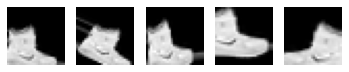

In [26]:
from matplotlib import pyplot as plt
gen = datagen.flow(x_train[0:1], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("off")
    plt.imshow(gen.next().squeeze(), cmap='gray')
    plt.plot()
plt.show()

### Run the above model using fit_generator()

In [27]:
model.fit_generator(datagen.flow(x_train, y_train, batch_size = 3000), validation_data = (x_test, y_test), 
                              steps_per_epoch = len(x_train) // 3000, epochs = 10, callbacks=[callback])

Epoch 1/10
20/20 [==============================] - 13s 635ms/step - loss: 0.8529 - accuracy: 0.6844 - val_loss: 0.5059 - val_accuracy: 0.8162
Epoch 2/10
20/20 [==============================] - 12s 614ms/step - loss: 0.8373 - accuracy: 0.6916 - val_loss: 0.4929 - val_accuracy: 0.8230
Epoch 3/10
20/20 [==============================] - 13s 628ms/step - loss: 0.8181 - accuracy: 0.6975 - val_loss: 0.4783 - val_accuracy: 0.8289
Epoch 4/10
20/20 [==============================] - 13s 628ms/step - loss: 0.8076 - accuracy: 0.7040 - val_loss: 0.4896 - val_accuracy: 0.8249
Epoch 5/10
20/20 [==============================] - 12s 620ms/step - loss: 0.7929 - accuracy: 0.7067 - val_loss: 0.4972 - val_accuracy: 0.8213
Epoch 6/10
20/20 [==============================] - 13s 625ms/step - loss: 0.7842 - accuracy: 0.7131 - val_loss: 0.4812 - val_accuracy: 0.8281
Epoch 7/10
20/20 [==============================] - 12s 624ms/step - loss: 0.7727 - accuracy: 0.7181 - val_loss: 0.4764 - val_accuracy: 0.8287

###  Report the final train and validation accuracy

In [28]:
model.evaluate(x_test, y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4843 - accuracy: 0.8268


[0.48433440923690796, 0.8267999887466431]

In [29]:
model.evaluate(x_train, y_train)

1875/1875 [==============================] - 4s 2ms/step - loss: 0.4119 - accuracy: 0.8451


[0.4119279980659485, 0.8451333045959473]

## **DATA AUGMENTATION ON CIFAR10 DATASET**

One of the best ways to improve the performance of a Deep Learning model is to add more data to the training set. Aside from gathering more instances from the wild that are representative of the distinction task, we want to develop a set of methods that enhance the data we already have. There are many ways to augment existing datasets and produce more robust models. In the image domain, these are done to utilize the full power of the convolutional neural network, which is able to capture translational invariance. This translational invariance is what makes image recognition such a difficult task in the first place. You want the dataset to be representative of the many different positions, angles, lightings, and miscellaneous distortions that are of interest to the vision task.

### **Import neessary libraries for data augmentation**

In [38]:

from tensorflow.keras.preprocessing.image import ImageDataGenerator

### **Load CIFAR10 dataset**

In [40]:
from tensorflow.keras.datasets import cifar10
(x_train_cifar,y_train_cifar),(x_test_cifar,y_test_cifar)= cifar10.load_data()

170500096/170498071 [==============================] - 6s 0us/step


### **Create a data_gen funtion to genererator with image rotation,shifting image horizontally and vertically with random flip horizontally.**

In [41]:
train_data_gen=ImageDataGenerator(rotation_range=30,horizontal_flip=True,vertical_flip=True,width_shift_range=0.2,height_shift_range=0.2)

### **Prepare/fit the generator.**

In [42]:
train_data_gen.fit(x_train_cifar)

In [44]:
x_train_cifar = x_train_cifar.astype('float32')
x_train_cifar/=255


### **Generate 5 images for 1 of the image of CIFAR10 train dataset.**

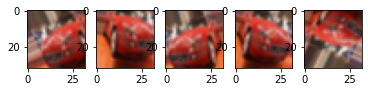

In [51]:
gen = train_data_gen.flow(x_train_cifar[5:6], batch_size=1)
for i in range(1, 6):
    plt.subplot(1,5,i)
    plt.axis("on")
    plt.imshow(gen.next().squeeze())
    plt.plot()
plt.show()
